In [ ]:
pip install citipy

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

In [34]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?units=metric&appid='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{weather_api_key}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | lompoc
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | lock haven
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | peniche
Processing Record 10 of Set 1 | ust-kuyga
Processing Record 11 of Set 1 | luderitz
Processing Record 12 of Set 1 | clyde river
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | warmbad
Processing Record 15 of Set 1 | omsukchan
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | kaeo
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | komsomolskiy
Processing Record 22 of Set 1 | aklavik
Process

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.4541,-133.0374,-19.00,78,20,2.57,CA,1680572449
1,hermanus,-34.4187,19.2345,12.11,81,100,1.95,ZA,1680572449
2,lompoc,34.6391,-120.4579,12.00,65,0,13.38,US,1680572449
3,georgetown,5.4112,100.3354,27.96,89,20,1.54,MY,1680572219
4,bluff,-46.6000,168.3333,14.89,71,75,5.41,NZ,1680572450


In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/tanneramman/Downloads/output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("/Users/tanneramman/Downloads/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tuktoyaktuk,69.4541,-133.0374,-19.00,78,20,2.57,CA,1680572449
1,hermanus,-34.4187,19.2345,12.11,81,100,1.95,ZA,1680572449
2,lompoc,34.6391,-120.4579,12.00,65,0,13.38,US,1680572449
3,georgetown,5.4112,100.3354,27.96,89,20,1.54,MY,1680572219
4,bluff,-46.6000,168.3333,14.89,71,75,5.41,NZ,1680572450


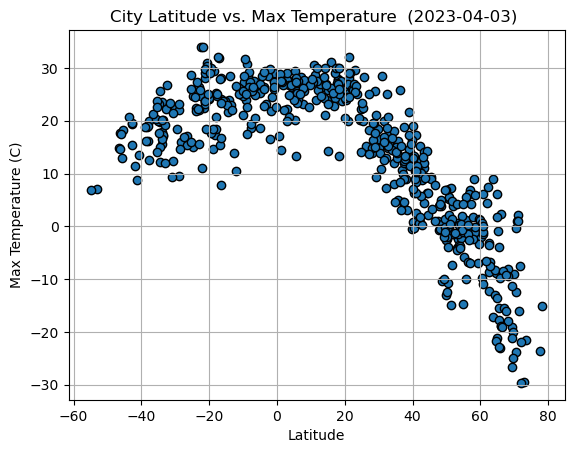

In [39]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df['Lat']
maxTemps = city_data_df['Max Temp']
plt.scatter(lats, maxTemps, edgecolor= 'black', linewidths= 1, marker = "o")
plt.grid(True)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime(" (%Y-%m-%d) ")}')
plt.xlabel(f'Latitude')
plt.ylabel(f'Max Temperature (C)')
# Save the figure
plt.savefig("/Users/tanneramman/Downloads/output_data/Fig1.png")

# Show plot
plt.show()

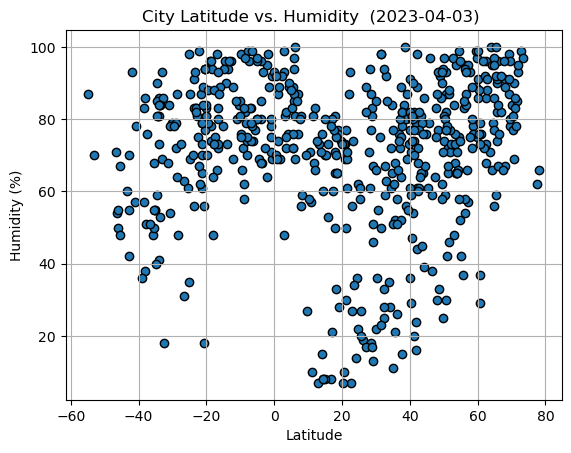

In [40]:
# Build scatter plot for latitude vs. humidity
lats = city_data_df['Lat']
maxTemps = city_data_df['Humidity']
plt.scatter(lats, maxTemps, edgecolor= 'black', linewidths= 1, marker = "o")
plt.grid(True)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime(" (%Y-%m-%d) ")}')
plt.xlabel(f'Latitude')
plt.ylabel(f'Humidity (%)')
# Save the figure
plt.savefig("/Users/tanneramman/Downloads/output_data/Fig2.png")

# Show plot
plt.show()

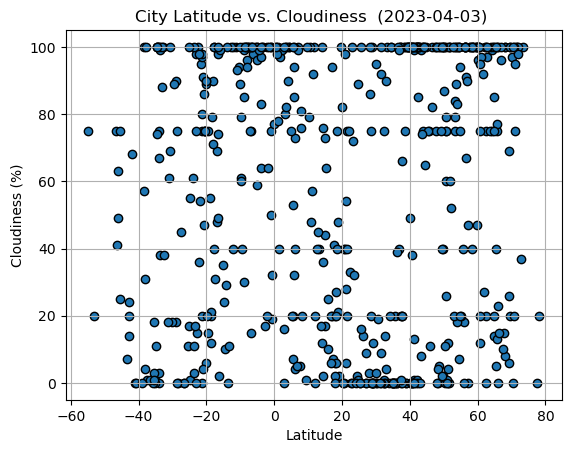

In [41]:
# Build scatter plot for latitude vs. cloudiness
lats = city_data_df['Lat']
maxTemps = city_data_df['Cloudiness']
plt.scatter(lats, maxTemps, edgecolor= 'black', linewidths= 1, marker = "o")
plt.grid(True)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness {time.strftime(" (%Y-%m-%d) ")}')
plt.xlabel(f'Latitude')
plt.ylabel(f'Cloudiness (%)')
# Save the figure
plt.savefig("/Users/tanneramman/Downloads/output_data/Fig3.png")

# Show plot
plt.show()

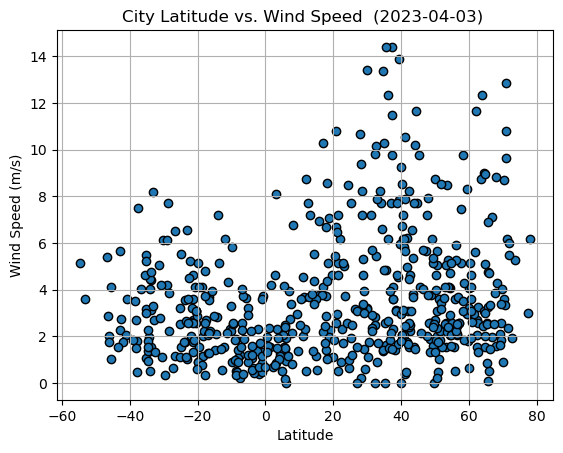

In [42]:
# Build scatter plot for latitude vs. wind speed
lats = city_data_df['Lat']
maxTemps = city_data_df['Wind Speed']
plt.scatter(lats, maxTemps, edgecolor= 'black', linewidths= 1, marker = "o")
plt.grid(True)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime(" (%Y-%m-%d) ")}')
plt.xlabel(f'Latitude')
plt.ylabel(f'Wind Speed (m/s)')
# Save the figure
plt.savefig("/Users/tanneramman/Downloads/output_data/Fig4.png")

# Show plot
plt.show()

In [58]:
# Define a function to create Linear Regression plots
def linRegress(xValues, yValues):
    global x 
    x = xValues
    global y
    y = yValues
    global slope, intercept, rvalue, pvalue, stderr
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
    global regressValues
    regressValues = xValues * slope + intercept
    global lineEq 
    lineEq = f'y = {str(round(slope, 2))}x + {str(round(intercept, 2))}'

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northHemi = city_data_df[(city_data_df['Lat']>=0)]

# Display sample data
northHemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tuktoyaktuk,69.4541,-133.0374,-19.00,78,20,2.57,CA,1680572449
2,lompoc,34.6391,-120.4579,12.00,65,0,13.38,US,1680572449
3,georgetown,5.4112,100.3354,27.96,89,20,1.54,MY,1680572219
5,lock haven,41.1370,-77.4469,17.27,82,99,0.39,US,1680572450
7,peniche,39.3558,-9.3811,14.05,81,100,7.83,PT,1680572450


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southHemi = city_data_df[(city_data_df['Lat']<=0)]

# Display sample data
southHemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,12.11,81,100,1.95,ZA,1680572449
4,bluff,-46.6000,168.3333,14.89,71,75,5.41,NZ,1680572450
6,atuona,-9.8000,-139.0333,27.30,76,61,5.84,PF,1680572438
9,luderitz,-26.6481,15.1594,17.05,63,0,6.52,NaN,1680572451
11,mataura,-46.1927,168.8643,14.71,50,49,1.99,NZ,1680572422


The r-value is: -0.8960333623987758


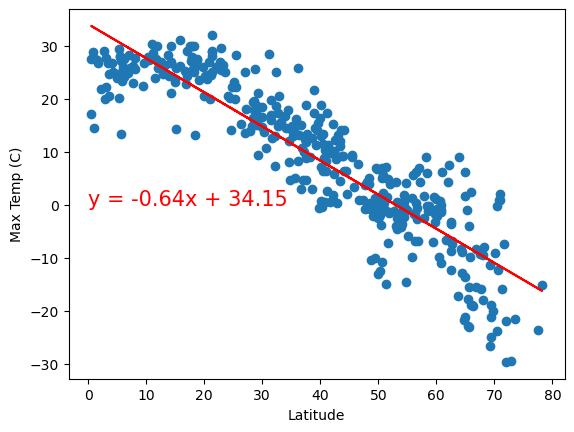

In [60]:
# Linear regression on Northern Hemisphere
linRegress(northHemi['Lat'], northHemi['Max Temp'])

plt.scatter(x, y)
plt.plot(x, regressValues, "r-")
plt.annotate(lineEq, (0,0), fontsize = 15, color = 'red')
plt.xlabel(f'Latitude')
plt.ylabel(f'Max Temp (C)')

print(f'The r-value is: {rvalue}')

The r-value is: 0.5629275082538994


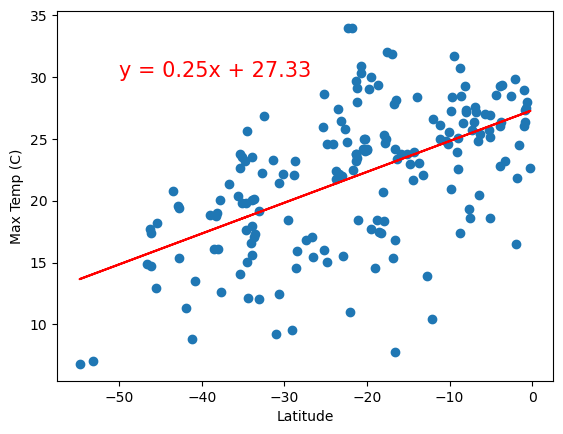

In [63]:
# Linear regression on Southern Hemisphere
linRegress(southHemi['Lat'], southHemi['Max Temp'])

plt.scatter(x, y)
plt.plot(x, regressValues, "r-")
plt.annotate(lineEq, (-50,30), fontsize = 15, color = 'red')
plt.xlabel(f'Latitude')
plt.ylabel(f'Max Temp (C)')

print(f'The r-value is: {rvalue}')

The r-value is: 0.24635900574433472


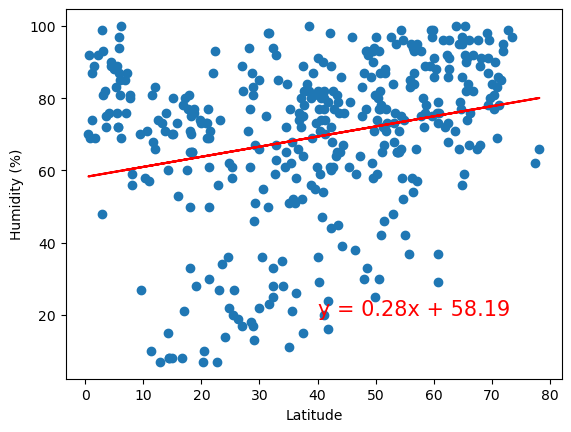

In [75]:
# Northern Hemisphere
linRegress(northHemi['Lat'], northHemi['Humidity'])

plt.scatter(x, y)
plt.plot(x, regressValues, "r-")
plt.annotate(lineEq, (40,20), fontsize = 15, color = 'red')
plt.xlabel(f'Latitude')
plt.ylabel(f'Humidity (%)')

print(f'The r-value is: {rvalue}')

The r-value is: 0.40243545631221084


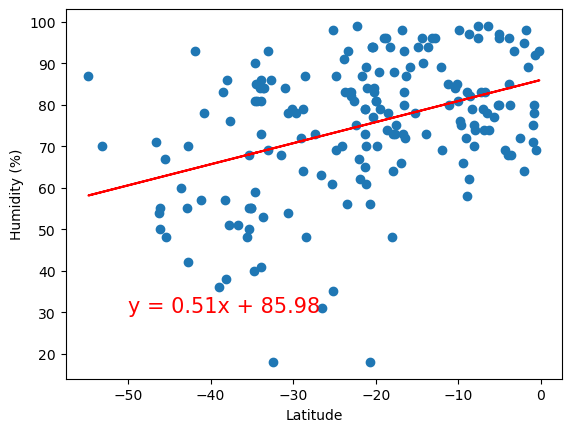

In [66]:
# Southern Hemisphere
linRegress(southHemi['Lat'], southHemi['Humidity'])

plt.scatter(x, y)
plt.plot(x, regressValues, "r-")
plt.annotate(lineEq, (-50,30), fontsize = 15, color = 'red')
plt.xlabel(f'Latitude')
plt.ylabel(f'Humidity (%)')

print(f'The r-value is: {rvalue}')

The r-value is: 0.15898306253046915


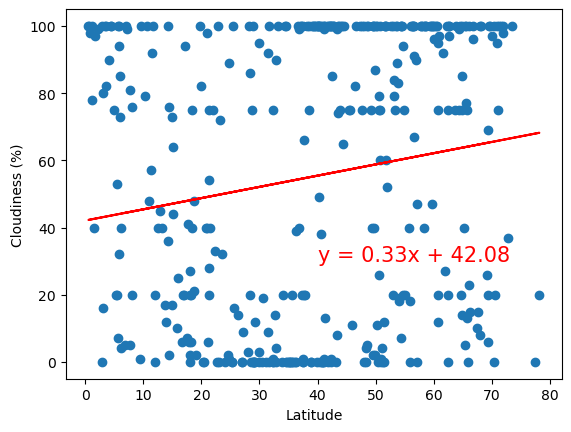

In [73]:
# Northern Hemisphere
linRegress(northHemi['Lat'], northHemi['Cloudiness'])

plt.scatter(x, y)
plt.plot(x, regressValues, "r-")
plt.annotate(lineEq, (40,30), fontsize = 15, color = 'red')
plt.xlabel(f'Latitude')
plt.ylabel(f'Cloudiness (%)')

print(f'The r-value is: {rvalue}')

The r-value is: 0.3480217112211517


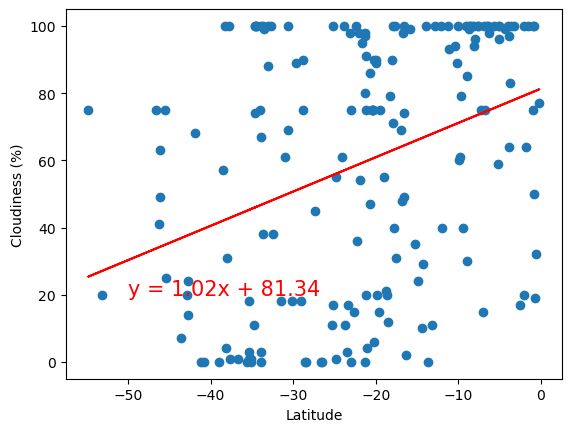

In [71]:
# Southern Hemisphere
linRegress(southHemi['Lat'], southHemi['Cloudiness'])

plt.scatter(x, y)
plt.plot(x, regressValues, "r-")
plt.annotate(lineEq, (-50,20), fontsize = 15, color = 'red')
plt.xlabel(f'Latitude')
plt.ylabel(f'Cloudiness (%)')

print(f'The r-value is: {rvalue}')

The r-value is: 0.11333000415784164


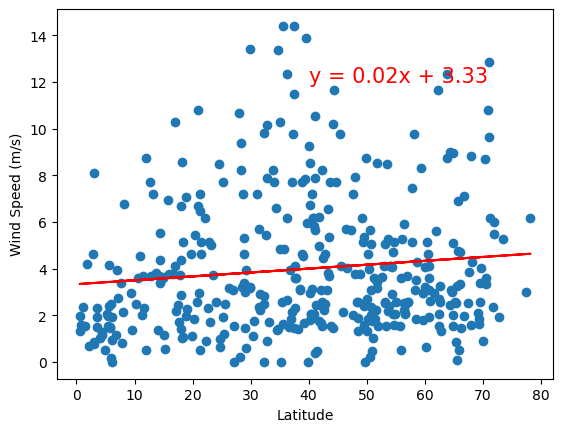

In [76]:
# Northern Hemisphere
linRegress(northHemi['Lat'], northHemi['Wind Speed'])

plt.scatter(x, y)
plt.plot(x, regressValues, "r-")
plt.annotate(lineEq, (40,12), fontsize = 15, color = 'red')
plt.xlabel(f'Latitude')
plt.ylabel(f'Wind Speed (m/s)')

print(f'The r-value is: {rvalue}')

The r-value is: -0.29586124536566694


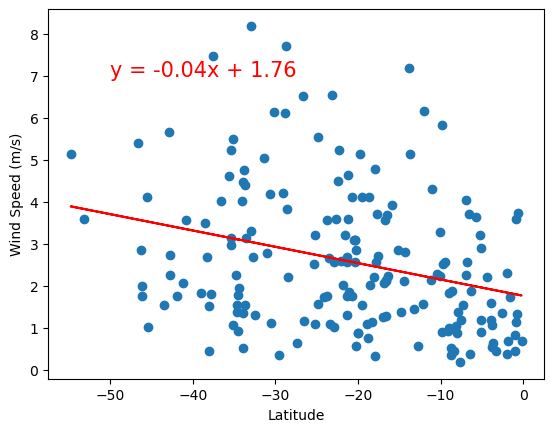

In [78]:
# Southern Hemisphere
linRegress(southHemi['Lat'], southHemi['Wind Speed'])

plt.scatter(x, y)
plt.plot(x, regressValues, "r-")
plt.annotate(lineEq, (-50,7), fontsize = 15, color = 'red')
plt.xlabel(f'Latitude')
plt.ylabel(f'Wind Speed (m/s)')

print(f'The r-value is: {rvalue}')